# A/B тестирование для принятия решений в бизнесе

## Описание проекта
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Описание данных
Файл `/datasets/hypothesis.csv`:
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Файл `/datasets/orders.csv`:
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.


Файл `/datasets/visitors.csv`:
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [66]:
hypotesis = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('display.max_colwidth', 0)
hypotesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Приоритизация гипотез методом ICE

In [67]:
hypotesis['ICE'] = round(hypotesis['Impact'] * hypotesis['Confidence'] / hypotesis['Efforts'], 2)
hypotesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


**Вывод:** В результате применения метода ***ICE*** наиболее приоритетными оказались гипотезы:
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

### Приоритизация гипотез методом RICE

In [68]:
hypotesis['RICE'] = hypotesis['Reach'] * hypotesis['Impact'] * hypotesis['Confidence'] / hypotesis['Efforts']
hypotesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**Вывод:** В результате применения метода ***RICE*** наиболее приоритетными оказались гипотезы:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	
Таким образом, учитывая охват гипотеза "Запустить акцию, дающую скидку на товар в день рождения" с первого места сместилась на пятое, а гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" наоборот стала лидером, и именно ее, на мой взляд, и стоит протестировать перовой.

## Анализ A/B теста
После проведения A/B-теста были получены результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

In [69]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [70]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [71]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [72]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [73]:
orders.duplicated().sum()

0

In [74]:
visitors.duplicated().sum()

0

**Вывод:** Пропуски в данных и дубликаты отсутсвуют. Необходимо заменить тип столбцов с датой

### Предобработка данных
Преобразуем типы в столбцах с датами

In [75]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим не пересекаются ли тестовые группы

In [76]:
a = set(orders[orders['group'] == "A"]['visitorId']) # множество id пользователей группы а
b = set(orders[orders['group'] == "B"]['visitorId']) # множество id пользователей группы b
a_and_b = a.intersection(b) # пересечение множеств id пользователей групп a и b
len(a.intersection(b))

58

58 человек вошли в обе группы, необходимо удалить их из датафрейма orders, и соответсвенно уменьшить количество пользователей в определенные даты в датафрейме visitors.

In [77]:
# создадим таблицу, где количество дублирующихся пользователей будет сгруппированно по дате и группе
# что бы впоследствии уменьшить на соответсвующее количество пользователей в датафрейме visitors
wrong_visitors = (orders.query('visitorId in @a_and_b')
               .groupby(['date', 'group'], as_index=False)
               .agg({'visitorId':'nunique'}).rename(columns={'visitorId':'wrong_visitors'})
              )

In [78]:
# удалим дублрующихся в обоих группах пользователей из orders
orders = orders.query('visitorId not in @a_and_b')

In [79]:
# удалим дублирующихся пользователей из visitors
visitors = visitors.merge(wrong_visitors, how='left', on=['date', 'group']).fillna(0)
visitors['visitors'] = (visitors['visitors'] - visitors['wrong_visitors']).astype('int')
visitors = visitors[['date', 'group', 'visitors']]

**Вывод:** В результате предобработки произведено преобразование типов. Из обоих таблиц удалены пользователи, состоящие в обоих тестируемых группах

### Анализ куммулятивных метрик
Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм `cumulativeData` со столбцами: 
- `date` — дата;
- `group` — группа A/B-теста (A или B);
- `orders` — кумулятивное количество заказов на указанную дату в указанной группе;
- `buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- `revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- `visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [80]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])]
                           .agg({'date':'max', 
                                 'group':'max', 
                                 'transactionId':'nunique', 
                                 'visitorId':'nunique', 
                                 'revenue':'sum'}), axis = 1)
                    .sort_values(by=['date', 'group'])
                   )

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[(visitors['date'] <= x['date']) & (visitors['group'] == x['group'])]
                             .agg({'date' : 'max', 
                                   'group' : 'max', 
                                   'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,718
1,2019-08-01,B,17,17,59758,710
2,2019-08-02,A,42,36,234381,1336
3,2019-08-02,B,40,39,221801,1290
4,2019-08-03,A,66,60,346854,1843


Построим графики ***кумулятивной выручки*** по дням и группам A/B-тестирования:

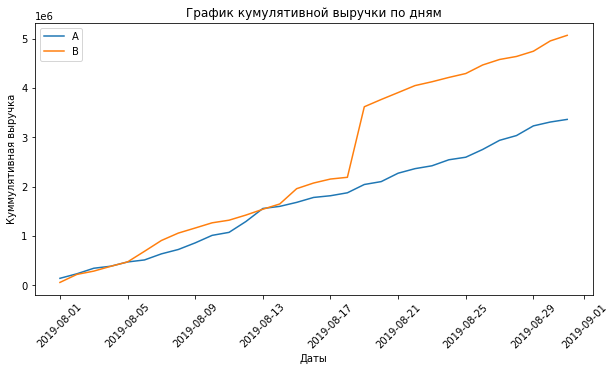

In [112]:


# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по дням')
plt.xlabel('Даты')
plt.ylabel('Куммулятивная выручка')
plt.xticks(rotation=45)
plt.legend();

**Вывод:** Куммулятивная выручка группы A почти линейно растет. С середины второй недели кумулятивная выручка группы B резко увеличилась и остается стабильно выше, чем у группы А. Это может говорить о резком увелисении числа заказов в группе В или о появлении очень дорогих заказов в выбоке

Построим график ***кумулятивного среднего чека*** по группам — разделим кумулятивную выручку на кумулятивное число заказов:


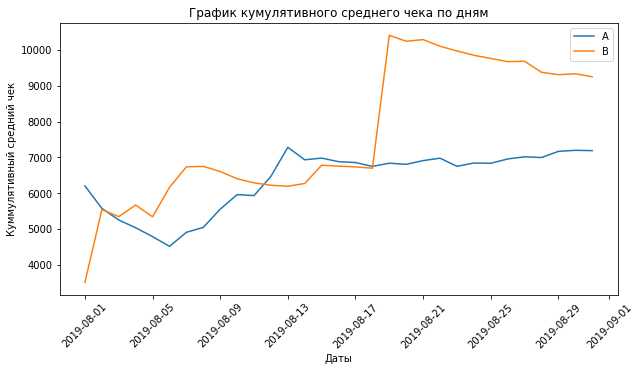

In [111]:
plt.figure(figsize=(10, 5))
plt.title('График кумулятивного среднего чека по дням')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Даты')
plt.ylabel('Куммулятивный средний чек')
plt.xticks(rotation=45)
plt.legend();

**Вывод:** Средний чек группы A становится равномерным к концу эксперимента и устанавливается на уровне 7000. Средний чек группы В значительно скакнул вверх в середине второй недели. Это объясняет резкое увеличение общей выручки группы B - в выборке появились очень дорогие заказы. Но со временем средний чек группы B снижается 

Построим график ***относительного изменения кумулятивного среднего чека группы B к группе A***

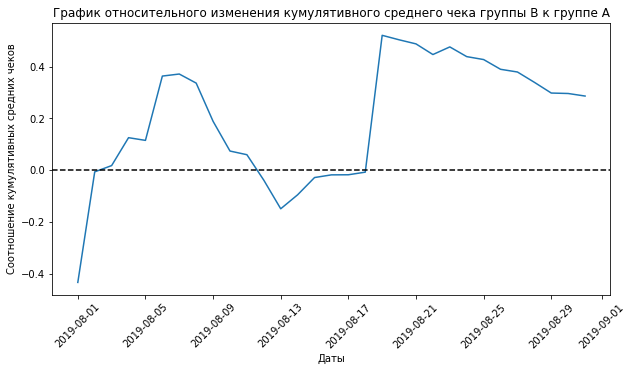

In [110]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('Даты')
plt.ylabel('Соотношение кумулятивных средних чеков')
plt.xticks(rotation=45)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

**Вывод:** В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы! Найдём их позже.

Построим график **кумулятивного количества заказов** по группам

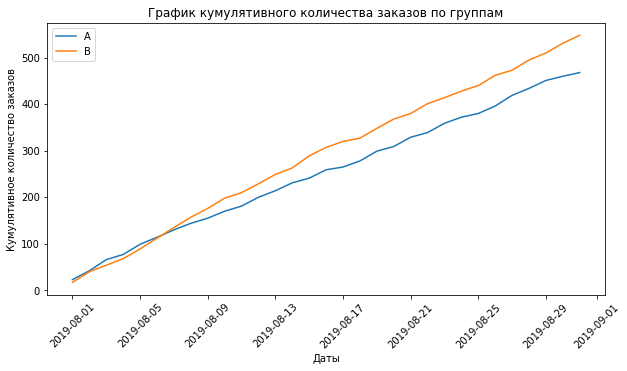

In [117]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10, 5))
plt.title('График кумулятивного количества заказов по группам')
plt.plot(cumulativeDataA['date'], cumulativeDataA['orders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['orders'], label='B')
plt.xlabel('Даты')
plt.ylabel('Кумулятивное количество заказов')
plt.xticks(rotation=45)
plt.legend();

**Вывод:** В конце первой недели группа B вырывается вперед по количеству заказов и держится стабильно выше группы A

Построим график ***относительного изменения кумулятивной количества заказов группы B к группе A***

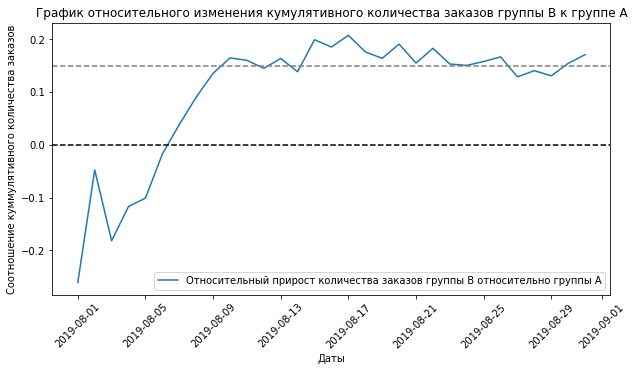

In [119]:
mergedCumulativeOrders = cumulativeDataA[['date','orders']].merge(cumulativeDataB[['date','orders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
plt.title('График относительного изменения кумулятивного количества заказов группы B к группе A')
plt.plot(mergedCumulativeOrders['date'], mergedCumulativeOrders['ordersB']/mergedCumulativeOrders['ordersA']-1, label="Относительный прирост количества заказов группы B относительно группы A")
plt.xlabel('Даты')
plt.ylabel('Соотношение куммулятивного количества заказов')
plt.xticks(rotation=45)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--');

**Вывод:** В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд и стабильно держится выше. В целом отношение количества заказов ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

### Анализ аномальных значений

Построим точечный ***график количества заказов по пользователям***

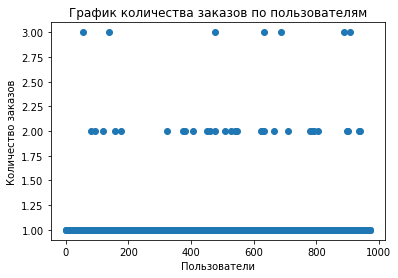

In [106]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']
plt.title('График количества заказов по пользователям')
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов'); 

**Вывод:** Большинство покупателей заказывали только один раз. Однако не мало пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

Посчитаем ***95-й и 99-й перцентили количества заказов на пользователя***

In [87]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

**Вывод:** Не более 1% пользователей оформляли больше чем два заказа. И 5% пользователей заказывали более одного раза. Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

Построим точечный ***график стоимостей заказов***

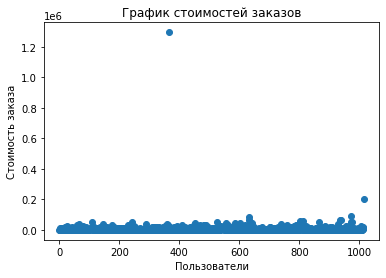

In [107]:
plt.title('График стоимостей заказов')
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа');

На графике видны два заказа которые выбиваются из общей массы и делают график неинформативным, построим еще один график без выбросов

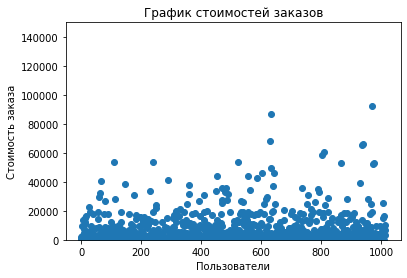

In [127]:
plt.title('График стоимостей заказов')
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 150000)
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа');

**Вывод:** По графику границу аномально дорогих заказов проходит в районе 60000. Но лучше определить точную границу расчитав перцентили

Посчитаем ***95-й и 99-й перцентили стоимости заказов***

In [89]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

**Вывод:** Не более 5% заказов дороже 26785 рублей и не более 1% дороже 53904 рублей. Выберем 53904 в качестве границы для определения аномальных заказов. Так мы уберем 1% пользователей в аномально дорогими заказами.

### Расчет статистической значимости

Посчитаем статистическую значимость различий ***в среднем количестве*** заказов на пользователя между группами ***по «сырым» данным*** — без удаления аномальных пользователей.\
\
Сформулируем гипотезы:\
Нулевая: различий в среднем количестве заказов по "сырым" данным между группами нет.\
Альтернативная: различия в среднем между группами есть.\
Уровень критической значимости установим 0.05

In [133]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули. 
# Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

alpha = .05

# Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
print('p-value -', "{0:.3f}".format(p_value))
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: различия в среднем количестве заказов между группами есть')
else:
    print('Нулевую гипотезу не отвергаем: различий в среднем количестве заказов между группами нет')
print('Отношение среднего количества заказов группы В к группе А -', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value - 0.011
Отвергаем нулевую гипотезу: различия в среднем количестве заказов между группами есть
Отношение среднего количества заказов группы В к группе А - 0.160


**Вывод:** присутсвуют статистически значимые различия в среднем числе заказов между группами. Среднее количество заказов группы В на 16% больше.

Посчитаем статистическую значимость различий ***в среднем чеке*** заказа между группами ***по «сырым» данным***.\
\
Сформулируем гипотезы:\
Нулевая гипотеза: различий в среднем чеке по "сырым" данным между группами нет.\
Альтернативная гипотеза: различия в среднем чеке между группами есть.\
Уровень критической значимости установим 0.05

In [134]:
# передадим критерию mannwhitneyu() данные о выручке с заказов
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                             orders[orders['group']=='B']['revenue'])[1]
print('p-value -', 
      '{0:.3f}'.format(p_value)
     )
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: различия в среднем чеке между группами есть')
else:
    print('Нулевую гипотезу не отвергаем: различий в среднем чеке между группами нет')
print('Отношение среднего чека группы В к группе А -', 
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
     ) 

p-value - 0.829
Нулевую гипотезу не отвергаем: различий в среднем чеке между группами нет
Отношение среднего чека группы В к группе А - 0.287


**Вывод:** статистически значимых различий в среднем числе заказов между группами нет, а наблюдаемое превышение среднего чека группы В на 28,7% не является значимым, получено случайно

Теперь расчитаем эти же показатели, но уже по очищенным данным, удалив аномальных пользователей, а именно тех, кто совершил больше 2 покупок и тех кто совершил покупки более чем на 30000 за раз. Для начала сформируем список аномальных пользователей

In [135]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Посчитаем статистическую значимость различий ***в среднем количестве*** заказов между группами теста ***по очищенным данным***. 

Сформулируем гипотезы:\
Нулевая: различий в среднем количестве заказов по "очищенным" данным между группами нет.\
Альтернативная: различия в среднем между группами есть.\
Уровень критической значимости установим 0.05

In [137]:
# подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# применим статистический критерий Манна-Уитни к полученным выборкам
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p-value -', 
      '{0:.3f}'.format(p_value)
     )
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: различия в среднем количестве заказов между группами есть')
else:
    print('Нулевую гипотезу не отвергаем: различий в среднем количестве заказов между группами нет')
print('Отношение среднего количества заказов группы В к группе А -', 
      '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)
     ) 

p-value - 0.007
Отвергаем нулевую гипотезу: различия в среднем количестве заказов между группами есть
Отношение среднего количества заказов группы В к группе А - 0.189


**Вывод:** аналогичный тому, что был получен по сырым данным. Разница среднего количества заказов между группами статистически значима. И составляет 19% в пользу B 

Посчитаем статистическую значимость различий ***в среднем чеке*** заказа между группами ***по «очищенным» данным***.

Сформулируем гипотезы:\
Нулевая: различий в среднем чеке заказов по "очищенным" данным между группами нет.\
Альтернативная: различия в среднем чеке между группами есть.\
Уровень критической значимости установим 0.05

In [138]:
p_value = stats.mannwhitneyu(
              orders[
                  np.logical_and(
                      orders['group'] == 'A',
                      np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]

print('p-value -', '{0:.3f}'.format(p_value))
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: различия в среднем чеке между группами есть')
else:
    print('Нулевую гипотезу не отвергаем: различий в среднем чеке между группами нет')
print('Отношение среднего чека группы В к группе А -', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value - 0.788
Нулевую гипотезу не отвергаем: различий в среднем чеке между группами нет
Отношение среднего чека группы В к группе А - -0.032


**Вывод:** статистически значимых различий в среднем чеке между группами по "очищенным" данным нет.

### Общий вывод
- Различие среднего количеству заказов между группами статистически значимо как по "сырым", так и по "очищенным" данным. Среднее количество заказов группы B значительно выше (16% - по "сырым" данным, 19% - по "очищенным")
- Различия между группами в среднем чеке нет, как по "сырым", так и по "очищенным" данным. 
- График различия количества заказов между группами сообщает, что результаты группы B начиная со второй недели значительно лучше группы А.
- График различия среднего чека говорит о том, что результаты группы B выше чем у группы А.

Исходя из выше изложенного, тест следует остановить, признать победу группы В.